**------------------------Questions Covered-----------------------------**

***12A	Graphs	https://www.hackerrank.com/challenges/torque-and-development/problem	dfs, greedy
12A	Graphs	https://www.hackerrank.com/challenges/journey-to-the-moon/problem	dfs, combinatorics																								
12A	Graphs	https://www.hackerrank.com/challenges/even-tree/problem	dfs, generic tree																								
12A	Graphs	https://leetcode.com/problems/course-schedule-ii/description/	new question																								
12A	Graphs	
https://www.hackerearth.com/practice/algorithms/graphs/graph-representation/practice-problems/algorithm/mancunian-and-liverbird-go-bar-hopping-2/
graph implementation																								
12A	Graphs	https://leetcode.com/problems/cheapest-flights-within-k-stops/description/	new added																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/dhoom-4/	doesnt look like graph ques, but graph theory used																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/monk-and-the-islands/	easy bfs																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/connected-horses-10/	graph + dp	timeout tc																							
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/we-are-on-fire/	graph + dfs																								
12A	Graphs	
https://www.hackerearth.com/practice/algorithms/graphs/depth-first-search/practice-problems/algorithm/mrinal-and-three-musketeers-128f4c52/
dfs																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/practice-problems/algorithm/efficient-network/	mst																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/practice-problems/algorithm/mr-president/	mst	timeout tc																							
12A	Graphs	
https://www.hackerearth.com/practice/algorithms/graphs/shortest-path-algorithms/practice-problems/algorithm/successful-marathon-0691ec04/
shortest path																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/shortest-path-algorithms/practice-problems/algorithm/minimizing-path-cost/	shortest path																								
12A	Graphs	https://www.hackerearth.com/practice/algorithms/graphs/topological-sort/practice-problems/algorithm/oliver-and-the-game-3/	topological sort***

In [1]:
import java.util.*;
import java.io.*;
String[] args =new String[0];

## **420. Roads and Libraries**
https://www.hackerrank.com/challenges/torque-and-development/problem

In [2]:
/*
View Question Link For Question Description
*/

In [6]:
/*
Using Disjoint Set
*/

In [8]:
public class Solution {
    public static int getRoot(int[] map, int ind){
        if(map[ind] < 0)
            return ind;
        else
            return getRoot(map, map[ind]);
    }

    public static void main(String[] args) {
        Scanner in = new Scanner(System.in);
        int q = in.nextInt();
        for(int a0 = 0; a0 < q; a0++){
            int n = in.nextInt();
            int m = in.nextInt();
            long x = in.nextLong();
            long y = in.nextLong();
            int[] map = new int[n];
            Arrays.fill(map, -1);
            for(int a1 = 0; a1 < m; a1++){
                int city_1 = in.nextInt()-1;
                int city_2 = in.nextInt()-1;
                int root_1 = getRoot(map, city_1);
                int root_2 = getRoot(map, city_2);
                if(root_1 != root_2){
                    if(map[root_1]<map[root_2]){
                        map[root_1] = map[root_1]+map[root_2];
                        map[root_2] = root_1;
                    }else{
                        map[root_2] = map[root_1]+map[root_2];
                        map[root_1] = root_2;
                    }
                }
            }
            //get sets
            Queue queue = new LinkedList();
            for(int i=0;i<n;i++){
                if(map[i] < 0)
                    queue.add(map[i]);
            }
            //build library: size*x
            //build route: (size-1)*y+x
            if(x>y){
                long sum = 0;
                while(!queue.isEmpty()){
                    sum += ((int)queue.poll()+1)*y-x;
                }
                System.out.println(-sum);
            }else{
                long sum = 0;
                while(!queue.isEmpty()){
                    sum += ((int)queue.poll())*x;
                }
                System.out.println(-sum);
            }
        }
    }
}
Solution.main(args);

2 3 3 2 1 1 2 3 1 2 3 6 6 2 5 1 3 3 4 2 4 1 2 2 3 5 6
4
12


In [10]:
/*
Check For input

2
3 3 2 1
1 2
3 1
2 3
6 6 2 5
1 3
3 4
2 4
1 2
2 3
5 6

Output -->
4
12
*/

In [12]:
/*
Summary 1--

It's easy to overthink this one.

If the cost of a road is >= the cost of a library, 
    just build a library at each node.

Otherwise, 
    use DFS to get the number of nodes (ct) in each connected component. 
        Put 1 library in each component, 
        and the total per component cost is simply 
        ct-1 (a road to connect to each node in the compomnent) * cost of a road + cost of one library.

You'll never put more than one library per component 
    because once you're adding an additional node to a component, 
    the cost of just building a road will always be cheaper than the cost of disconnecting the node (not building a road)
    and building a library instead.
*/

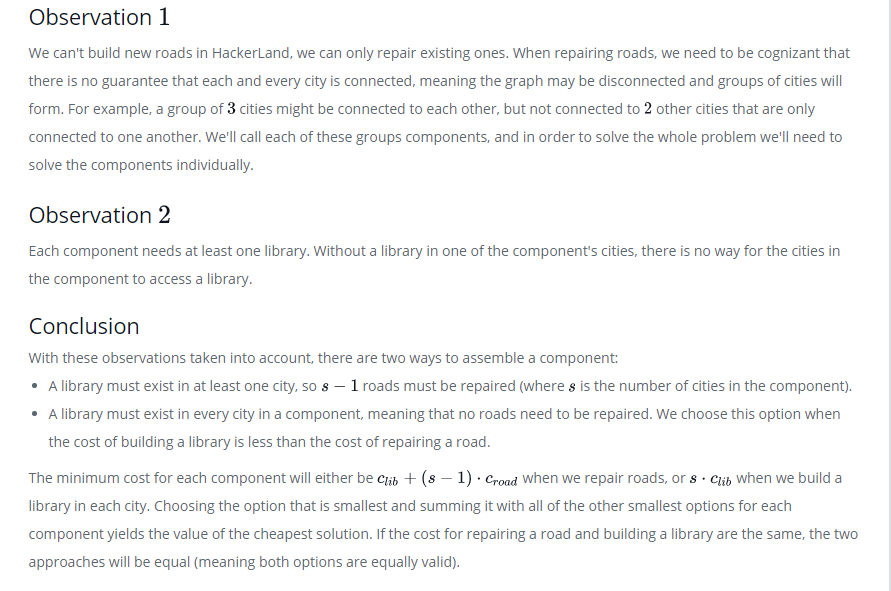

***https://ideone.com/tXTmEw***

***https://ideone.com/54FAZA***

In [13]:
/*
Time Complexity:
O(N)
*/

## **421. Journey to the Moon**
https://www.hackerrank.com/challenges/journey-to-the-moon/problem

In [20]:
/*
View Question Link For Question Description
*/

In [15]:
/*
This problem can be thought of as a graph problem. 
The very first step is to compute how many different countries are there. 
For this, we apply Depth First Search to calculate 
    how many different connected components are present in the graph where the vertices are represented by the people
    and the people from the same country form one connected component. 

After we get how many connected components are present, say M,
    we just need to calculate the number of ways of selecting two persons from two different connected component.
    Let us assume that component i contains Mi people. 
    So, for the number of ways selecting two persons from different components, 
        we subtract the number of ways of selecting two persons from the same component 
            from the total numbers of ways of selecting two persons i.e.

Ways = N choose 2 - (∑(Mi Choose 2) for i = 1 to M)
*/

***https://ideone.com/uawL5I***

In [16]:
public class Solution {

    public static void main(String[] args) throws InterruptedException {
        Scanner x = new Scanner(System.in);
        int N, P;
        N = x.nextInt();
        P = x.nextInt();

        Graph g = new Graph(N);
        for (int i = 0; i < P; i++) {
            g.addEdge(x.nextInt(), x.nextInt());
        }
        System.out.println(g.solve());
        x.close();
    }
}

class Graph{
    static int V;
    static boolean visited[];
    HashMap<Integer, ArrayList<Integer>> graph;
    Graph(int V){
        this.V = V;
        visited = new boolean[V];
        graph = new HashMap<>();
        for (int i = 0; i < V; i++) {
            graph.put(i, new ArrayList<>());
        }
    }

    public void addEdge(int s, int d) {
        graph.get(s).add(d);
        graph.get(d).add(s);
    }

    public int DFS(int s) {
        int count = 1;
        visited[s] = true;
        for (Integer i : graph.get(s)) {
            if(!visited[i]) {
                count+=DFS(i);
            }
        }
        return count;
    }

    public ArrayList<Integer> traversal(){
        ArrayList<Integer> countrySizes = new ArrayList<>();
        for (int i = 0; i < visited.length; i++) {
            if(!visited[i])
                countrySizes.add(DFS(i));
        }
        return countrySizes;
    }

    public long solve() {
        ArrayList<Integer> countrySizes = traversal();
        long sum = 0, result=0;
        for(int size : countrySizes){
           result += sum*size;
           sum += size;    
         }   
        return result;
    }
}
Solution.main(args);

5 3 0 1 2 3 0 4
6


In [17]:
/*
Input

5 3
0 1
2 3
0 4

Output

6
*/

In [19]:
/*
Description

The question demands the concept of using disjoint sets. (find and union with rank and path compression).

However, this method below using DFS also works (which I think i pretty similar to the editorial) :

We need to find the distinct sets (i.e. if x and y are from same country, they belong to same set) to get the answer.
    Let's say set A has a elements,set B has b elements.

Answer = a x b. [Because actual formula is to select one from set A and another one from set B = aC1 x bC1 = a x b]

Similarly, let's calculate answer for 4 sets - A,B,C,D with a,b,c,d elements respectively.

Lets say somehow I find set A has a elements.

Answer = 0 (Since I don't have another country to pair with)

Now, I find set B with b elements.

Answer = axb; .................................................(1)

Then, I find set C with c elements.

Answer = (axb) + (axc) + (bxc) [because we can select a pair from A and B, or A and C or B and C]

But this can be written as

Answer = (axb) + (a+b)xc ......................................(2)

Now I find set D with d elements, and I've examined all people.

Answer = (axb) + (axc) + (axd) + (bxc) + (bxd) + (cxd)

Or

Answer = (axb) x (a+b)xc + (a+b+c)xd ..........................(3)

Do you see the pattern? 
    That means when we find a new set, the new answer is the old answer + the sum of old values x new value.

Now, how do we find the people of same country?

Make each person a node. Draw an edge for every input (i.e. they belong to same country)

Now, run DFS starting from every node (if the node is not already visited). DFS should return the nodes in that set.

Example:

10 7
0 2
1 8
1 4
2 8
2 6
3 5
6 9

Graph:

0 ---- 2 ---- 6     3     7
          |        |      |
          |        |      |
1 ---- 8       9     5
|
|
4

3 sets {0,1,2,4,6,8,9} {3,5} {7}

DFS from 0 returns "7"

answer = 0

DFS from 1 should not start [since we have vistied 1 while dfs(0)]

DFS from 2 should not start ...

DFS from 3 returns "2"

answer = 7 * 2 = 14

DFS from 7 returns "1"

answer = 14 + (7+2)*1

answer = 23
*/

## **422. Even Tree**
https://www.hackerrank.com/challenges/even-tree/problem

In [21]:
/*
View Question Link For Question Description
*/

In [22]:
/*
Problem Overview

Given a tree print the maximum number of edges that can be removed to form a forest(a disjoint union of trees) 
    in which each connected component of the forest should contain an even number of vertices.

Also, note that the input graph will be such that it can always be decomposed into components 
    containing an even number of nodes which indirectly means that N is even.
*/

In [24]:
/*
Approach

What we need is a subtree that has even number of vertices 
and as we get it we can remove the edge that connects it to the remaining of the tree 
so that we are left with a subtree of even vertices
and the remaining tree with vertices N -(No. of vertices in the subtree removed). 
Now we are left with the same problem again with remaining tree having even number of vertices 
because remember that N is even so even-even=even, 
so we have to repeat this algorithm until the remaining tree cannot be decomposed further in the above manner. 
To maximize the number of subtree remove(which is equal to the number of edges removed) 
we have to remove subtree which cannot be decomposed in the above manner.


To do this we can traverse the tree using dfs and the dfs function 
should return the number of vertices in the subtree of which the current node is the root. 
If a node gets in return an even number of vertices from one of it child 
    then the edge from that node to its child should be removed 
and if the number is odd add it to the number of vertices that the subtree will have 
    if the current node is the root of it.
*/

In [25]:
// ans is total number of edges removed and al is adjacency list of the tree.
int dfs(int node)
{
    visit[node]=true;
    int num_vertex=0;
    for(int i=0;i<al[node].size();i++)
    {
        if(!visit[al[node][i]])
        {
            int num_nodes=dfs(al[node][i]);
            if(num_nodes%2==0)
                ans++;
            else
                num_vertex+=num_nodes;
        }
    }
    return num_vertex+1;
}

In [26]:
/*
Note: You can start the dfs from any node assuming that it's the root because it will have no effect on the answer.
*/

***https://ideone.com/06zevg***

In [27]:
/*
Try counting the children. 
If the subtree has even number of nodes 
    then the edge leading to this subtree can be removed. 
Otherwise, 
    you have to keep on searching until you find a suitable edge or the entire tree exhausted.
As it always can be decomposed into forests of even number of nodes, 
    you will always end up with an answer greater than 1.
*/

## **423. Course Schedule II**
https://leetcode.com/problems/course-schedule-ii/description/

In [28]:
/*
View Question Link For Both Description and Solution
*/

**Solution :**   ***https://leetcode.com/problems/course-schedule-ii/solution/***  

## **424. Mancunian And Liverbird Go Bar Hopping**
https://www.hackerearth.com/practice/algorithms/graphs/graph-representation/practice-problems/algorithm/mancunian-and-liverbird-go-bar-hopping-2/

In [31]:
/*
View Question Link For Question Description
*/

In [30]:
/*
Update as given here, will toggle direction of all the edges. 
Hence there are only two configurations possible for the (linear) graph.
We will precompute answer for every node for both configurations.

For each configuration, 
    we can find maximum reachable nodes from each node on either side(left and right). 
    Consider given configuration(when its not toggled). 
For a particular node a, if edge from (a-1) node points to a,

    number of left reachable nodes from a = number of left reachable nodes from (a-1) + 1
    
else, number of left reachable nodes from a = 1(itself).

In this way,
    we can generate number of left reachable nodes from any node by traversing left to right. 
In similar fashion, 
    we can generate number of right reachable nodes by traversing from right to left, and answer for each query will be
    
    number of left reachable nodes + number of right reachable nodes - 1
    
Subtracting one, because node itself is counted twice.

This should be done for both configurations, 
    now each query and update can be performed in O(1), by doing pre computation in O(n).
*/

***https://ideone.com/IHNdG6***

***https://ideone.com/wa4Gq1***

## **425. Cheapest Flights Within K Stops**
https://leetcode.com/problems/cheapest-flights-within-k-stops/description/

In [32]:
/*
View Question Link For Question Description
*/

***https://leetcode.com/problems/cheapest-flights-within-k-stops/discuss/516723/Four-Method-To-Solve-This-Program***

In [34]:
/*
The idea is Dijkstra's Algorithm. However, we need to modify it.

Brief Explanation of Correctness:
The proof of Dijkstra's Algorithm will not be repeated here. 
We just say that the original graph G can be modified into a subgraph G' where only the nodes and edges can be visited in (K+1) steps are kept (not sure if dst is included).

If we run Dijkstra's on subgraph G' and dst is in G', it should be shortest path from src to dst.

Algorithm:

Initially push the src into the heap
for every step:
1. check if the current top element in heap is dst. If so return its costFromSrc;
2. Push every adjacent edge into the heap if the distance is less than k;
3. If it is larger than k, no more neighbors get pushed into the heap;
If until the end, we cannot find dst, return -1;
*/

In [35]:
class Pair {
    int city, cost;

    Pair(int city, int cost) {
        this.city = city;
        this.cost = cost;
    }
}

class City {
    int city, distFromSrc, costFromSrc;

    City(int city, int distFromSrc, int cost) {
        this.city = city;
        this.distFromSrc = distFromSrc;
        this.costFromSrc = cost;
    }
}

In [37]:
class Solution {

    public int findCheapestPrice(int n, int[][] flights, int src, int dst, int K) {
        // DFS
        if(n <= 0 || flights == null || flights.length == 0 || K < 0)
            return -1;

        List<List<Pair>> graph = new ArrayList<>();
        this.buildGraph(graph, n, flights);

        Queue<City> pQueue = new PriorityQueue<>((City c1, City c2) -> c1.costFromSrc - c2.costFromSrc);
        pQueue.offer(new City(src, 0, 0));

        int totalCost = 0;

        while (!pQueue.isEmpty()) {
            City top = pQueue.poll();

            if (top.city == dst) {
                return top.costFromSrc;
            }

            if (top.distFromSrc > K) {
                continue;
            }

            List<Pair> neighbors = graph.get(top.city);
            for (Pair neighbor: neighbors) {
                pQueue.offer(new City(neighbor.city, top.distFromSrc + 1, top.costFromSrc + neighbor.cost));
            }
        }

        return -1;
    }

    private void buildGraph(List<List<Pair>> graph, int n, int[][] flights) {
        for (int i = 0; i < n; i++) {
            graph.add(new ArrayList<>());
        }

        for (int[] flight: flights) {
            graph.get(flight[0]).add(new Pair(flight[1], flight[2]));
        }
    }
}

***https://leetcode.com/problems/cheapest-flights-within-k-stops/discuss/434585/Java-Dijkstra's-Algorithm-Clean-and-Easy-to-Understand***

In [40]:
int n = 3;
int edges[][] = {{0,1,100},
             {1,2,100},
             {0,2,500}};
int src = 0;
int dest = 2;
int k = 1;
Solution s  =new Solution();
int out = s.findCheapestPrice(n,edges,src,dest,k);
System.out.println(out);
//Output: 200

200


## **426. Dhoom 4**
https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/dhoom-4/

In [41]:
/*
Samarpit is the main hero of the Dhoom 4.
He is trying to steal from the Code Bank Of Hackers.
Samarpit has a key with an integer value printed on it. 
He also has N other keys with each key having its own specific value.
Samarpit is trying to break the Lock for which he is supposed to get to the lock's key value. 
He can perform one type of operation.
    Take his own key and one of the other N keys and merge them.
    During merging Samarpit's Key value changes to product of both the keys modulus 100000.

For example 

if his key value was X and he took a key with value Y 
    the his new key will be (X*Y)%100000.
The other key that was used during the merging process remains along with other N-1 keys.

This entire process of merging takes 1 second.
    Now since he is in a hurry he asks to you to find the minimum time in which he could reach to the lock's key value.
*/

In [42]:
/*
Input:
The first line contains 2 integers they are Samarpit's Key value and the Lock's key value.
The second line contains N indicating the number of other keys Samarpit has.
Third line contains N space separated integers indicating the value of N other keys.

Output:
The minimum time required to get to the Lock's Key.If he is unable to reach that print -1.

Constraints:
1 ≤ N ≤ 1000
1 ≤ Value of all the keys ≤ 100000
*/

In [43]:
/*
Example--

SAMPLE INPUT 
3 30
3
2 5 7

SAMPLE OUTPUT 
2

Explanation
In the first second he can take make his own key to value 6 by multiplying it by 2.
Then in the next second he can multiply his new key with 5 to get to 30.
*/

In [44]:
/*
This question was a basic graph question. 
As one can see there can be maximum of 10^5 states 
    so we can check all these states by applying a simple BFS.
Since each time a new state is discovered we can mark it so that we do not visit it the next time .
States here refer to a new key value obtained after the merging process.
*/

***https://ideone.com/tS1Ne2***

***https://ideone.com/6jrJbp***

In [46]:
public static void main(String args[]) {

    Scanner in = new Scanner(System.in);

    int ownKey = in.nextInt();
    int lockKey = in.nextInt();

    int n = in.nextInt();
    int keys[] = new int[n];

    for (int i = 0; i < n; i++) {
        keys[i] = in.nextInt();
    }

    HashMap<Integer, Integer> time = new HashMap<Integer, Integer>();   // to store time taken
    time.put(ownKey, 0);

    Queue<Integer> q = new LinkedList<Integer>();     					       // to keep track of a visited combination

    q.add(ownKey);
    while (!q.isEmpty()) {
        int element = q.remove();

        if (element == lockKey) {									                    	// if we found the combination, return value from the hashmap
            System.out.println(time.get(element));
            return;
        }

        for (int i = 0; i < n; i++) {									                  // else create more initial keys
            long prod = (((long) element) * keys[i]) % 100000;

            if (!time.containsKey((int) prod)) {
                time.put((int) prod, time.get(element) + 1);		      	// we store time 1 greater than previous sice we are going to next level.
                q.add((int) prod);
            }
        }

    }

    System.out.println(-1);
}
main(args);

3 30 3 2 5 7
2


**Related Link :**  ***http://laymansalgo.blogspot.com/2017/09/hacker-earth-tutorial-dhoom4-easy.html***

In [ ]:
public class BigO22002 {

    private static boolean[] checked = new boolean[100000];
    private static int[] keys;

    public static void main(String[] args) {
        Scanner userInput = new Scanner(System.in);
        int k1 = userInput.nextInt();
        int lock = userInput.nextInt();
        int numKeys = userInput.nextInt();
        keys = new int[numKeys];
        for (int i = 0; i < numKeys; i++) {
            keys[i] = userInput.nextInt();
        }
        userInput.close();
        Queue<Integer> q1 = new LinkedList<>();
        Queue<Integer> q2 = new LinkedList<>();
        checked[k1] = true;
        q1.add(k1);
        int count = 0;
        while (!q1.isEmpty()) {
            count++;
            while (!q1.isEmpty()) {
                int k = q1.remove();
                for (int i = 0; i < numKeys; i++) {
                    int K = (int)(((long)k * keys[i]) % 100000);
                    if (K == lock) {
                        System.out.println(count);
                        System.exit(0);
                    } else if (checked[K] == false) {
                        q2.add(K);
                        checked[K] = true;
                    }
                }
            }
            q1 = q2;
            q2 = new LinkedList<>();
        }
        System.out.println(-1);
    }

}
BigO22002.main(args);

3 30 3 2 5 7
2


## **427. Monk and the Islands**
https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/monk-and-the-islands/

In [3]:
/*
Monk visits the land of Islands. 
There are a total of N islands numbered from 1 to N. 
Some pairs of islands are connected to each other by Bidirectional bridges running over water.

Monk hates to cross these bridges as they require a lot of efforts. 
He is standing at Island #1 and wants to reach the Island #N. 
Find the minimum the number of bridges that he shall have to cross, if he takes the optimal route.
*/

In [4]:
/*
Input:
First line contains T. T testcases follow.
First line of each test case contains two space-separated integers N, M.
Each of the next M lines contains two space-separated integers X and Y ,
denoting that there is a bridge between Island X and Island Y.

Output:
Print the answer to each test case in a new line.

Constraints:
1 ≤ T ≤ 10
1 ≤ N ≤ 104
1 ≤ M ≤ 105
1 ≤ X, Y ≤ N
*/

In [5]:
/*
Example--

SAMPLE INPUT 
2
3 2
1 2
2 3
4 4
1 2
2 3
3 4
4 2

SAMPLE OUTPUT 
2
2
*/

In [6]:
/*
Prerequisites: BFS, Graph Theory

Problem:  

If you think of the islands as the vertices of a graph, 
the bridges become the edges of the graph as every bridge connects two islands in the same way 
    that every edge connects two vertices.
Now, the question asks us to find the shortest path from vertex 1 to vertex N on an unweighted graph.

Solution: 

To do this you can run a breadth-first search from vertex 1. 
The path taken by the breadth-first search to reach vertex N is guaranteed to be the shortest path from vertex 1 to N.
The following solution uses BFS for computing number of edges(bridges).
I would recommend you to read basic concepts of BFS.

Operation – 1: 

Initially we create an array of nodes with each node being a SET. 
Corresponding to the set array, we create a visit array to check whether a node has been visited or not. 
Initially visit array is set to false.

Operation – 2: 

For each pair p(a,b), we add a connection from a to b and b to a i.e. 
we push ‘a’ to the set node[b] and we push ‘b’ to the set node[a]. 
At the same time we reset visit[a] and visit[b] to false to mark them as not visited.

Operation – 3: 

Now we apply BFS to traverse and count the nodes. 
Inside BFS function we initialize a queue with starting node that is 1. 
Then we level order traverse. We keep a track of number of nodes encountered for every node. 

For ex:

For pairs
1 2
1 4
2 3

1{0} -> 2{1} -> 3{2} -> 4{1}

Note: We use Fast IO technique for faster input and output.
*/

***https://ideone.com/QhGmqJ***

In [8]:
static class InputReader {

    private InputStream stream;
    private byte[] buf = new byte[8192];
    private int curChar, snumChars;
    private SpaceCharFilter filter;

    public InputReader(InputStream stream) {
        this.stream = stream;
    }

    public int snext() {
        if (snumChars == -1)
            throw new InputMismatchException();
        if (curChar >= snumChars) {
            curChar = 0;
            try {
                snumChars = stream.read(buf);
            } catch (IOException e) {
                throw new InputMismatchException();
            }
            if (snumChars <= 0)
                return -1;
        }
        return buf[curChar++];
    }

    public int nextInt() {
        int c = snext();
        while (isSpaceChar(c))
            c = snext();
        int sgn = 1;
        if (c == '-') {
            sgn = -1;
            c = snext();
        }
        int res = 0;
        do {
            if (c < '0' || c > '9')
                throw new InputMismatchException();
            res *= 10;
            res += c - '0';
            c = snext();
        } while (!isSpaceChar(c));
        return res * sgn;
    }

    public long nextLong() {
        int c = snext();
        while (isSpaceChar(c))
            c = snext();
        int sgn = 1;
        if (c == '-') {
            sgn = -1;
            c = snext();
        }
        long res = 0;
        do {
            if (c < '0' || c > '9')
                throw new InputMismatchException();
            res *= 10;
            res += c - '0';
            c = snext();
        } while (!isSpaceChar(c));
        return res * sgn;
    }

    public int[] nextIntArray(int n) {
        int a[] = new int[n];
        for (int i = 0; i < n; i++)
            a[i] = nextInt();
        return a;
    }

    public String readString() {
        int c = snext();
        while (isSpaceChar(c))
            c = snext();
        StringBuilder res = new StringBuilder();
        do {
            res.appendCodePoint(c);
            c = snext();
        } while (!isSpaceChar(c));
        return res.toString();
    }

    public boolean isSpaceChar(int c) {
        if (filter != null)
            return filter.isSpaceChar(c);
        return c == ' ' || c == '\n' || c == '\r' || c == '\t' || c == -1;
    }

    public interface SpaceCharFilter {
        public boolean isSpaceChar(int ch);
    }
}

In [9]:
static class Graph {
    int V;
    List<Integer>[] adjs;

    Graph(int nodes) {
        V = nodes;
        adjs = (List<Integer>[]) new List[nodes + 1];
        for (int v = 0; v <= nodes; v++)
            adjs[v] = new ArrayList<>();
    }

    void addEdge(int source, int dest) {
        adjs[source].add(dest);
        adjs[dest].add(source);
    }

    Iterable<Integer> ads(int v){
        return adjs[v];
    }

    int MinHopPathFor(int N){
        if(N == 1)
            return 0;

        Queue<Integer> nodes = new LinkedList<>();
        Queue<Integer> hopsRequired = new LinkedList<>();
        nodes.add(1);
        hopsRequired.add(1);
        boolean[] visited = new boolean[N];

        while (!nodes.isEmpty()){
            Integer node = nodes.remove();
            int hops = hopsRequired.remove();
            for (Integer vertex : ads(node)){
                if (vertex == N)
                    return hops;
                nodes.add(vertex);
                hopsRequired.add(hops+1);
            }
        }

        return -1;
    }
}

In [10]:
public static void main(String[] args) {
    InputReader in = new InputReader(System.in);
    PrintWriter out = new PrintWriter(System.out);

    int T = in.nextInt();
    for (int i = 0; i < T; i++) {
        int N = in.nextInt();
        int M = in.nextInt();
        Graph graph = new Graph(N);
        for (int j = 0; j < M; j++) {
            graph.addEdge(in.nextInt(), in.nextInt());
        }
        out.println(graph.MinHopPathFor(N));
    }
    out.close();
}
main(args);

2 3 2 1 2 2 3 4 4 1 2 2 3 3 4 4 2
2
2


## **428. Connected Horses**
https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/connected-horses-10/

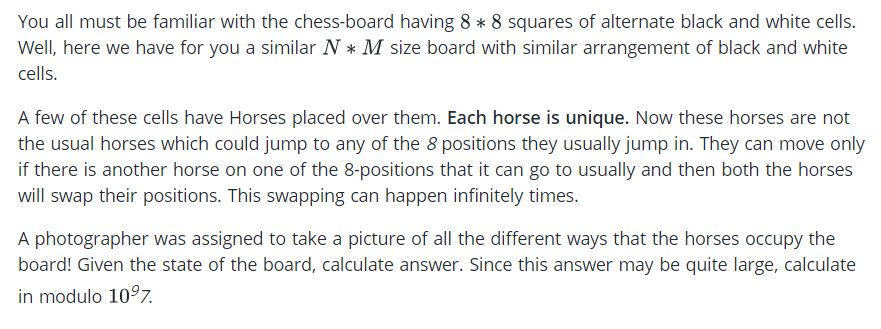

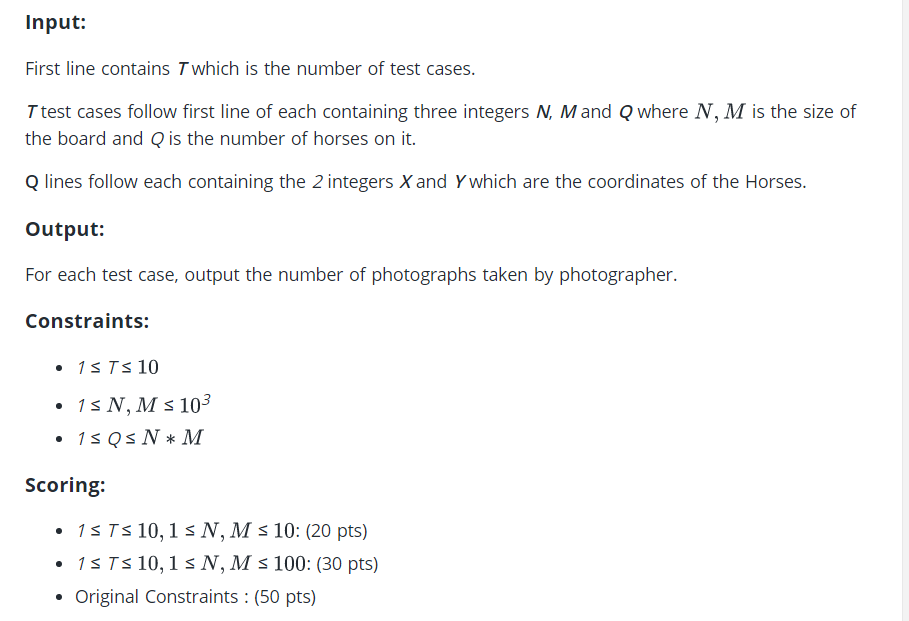

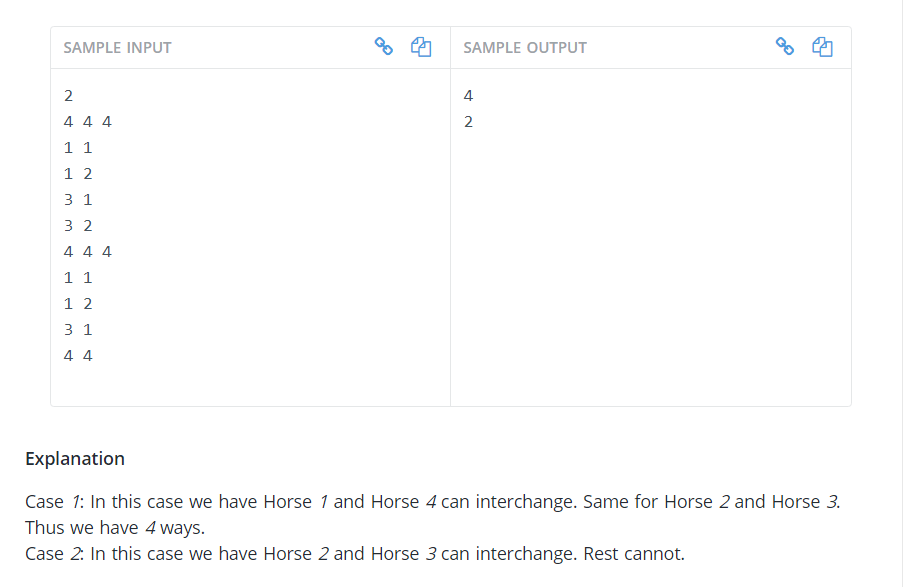

In [12]:
/*
Brief Description:

Given three integers N,M and Q where N,M is the size of the board and Q is the number of horses on it.
Q lines follow each containing the 2 integers X and Y which are the coordinates of the Horses.

output the number of photographs taken by photographer 
(The multiplication of factorials of number of each connected group of horses).

Pre-requisites:

Dynamic Programming Concept, DFS, Math.

Difficulty Level: 

Easy - Medium.

Hints:

Use (DFS) to traverse the board and counting the number of horses
int each connected group, then find the factorial of this number.
Apply the same concept in each connected group of horses.
*/

In [13]:
/*
Detailed Editorial:

This Question depends on your Graph Skills (DFS), Math Skills.

Firstly:

Check this condition "Now these horses are not the usual horses which could jump
to any of the 8 positions they usually jump in. They can move only if there is another
horse on one of the 8-positions that it can go to usually and then both the horses
will swap their positions. This swapping can happen infinitely times."

So you should count how many horses in a connected group.

Note: Connected group means that you can swap any 2 horses in the
group in some number of movements.

So You should use a DFS to traverse each group and check how many
horses in each group, as you can swap them with each other.

Secondly:

If you have for instance 5 horses in a group, how many number of ways
you can swap them ?

Note: This Question has the same meaning of "how to arrange n horses in r places ?"

So you can use this law in counting:
*/

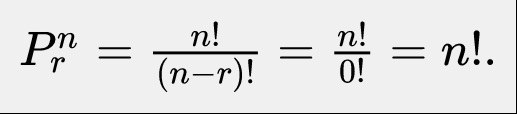

In [14]:
/*
Thirdly:

So now how to calculate the factorial ?

Note: you can't calculate the factorial each time you want because this
will result in Time Limit Exceeded, as each factorial take .

So you should use DP for that:

void pre_calculate(){       // calculating factorial

    factorial[0] = 1;
    for(long long i = 1; i <= 1e6; i++){
        factorial[i] = (factorial[i - 1] * i) % mod;
    }
}


In last:

You should multiply all groups factorials with each other to get the
number of ways for different photographs.
*/

In [15]:
/*
Time Complexity : O(N^2)
Space Complexity : O(N^2)
*/

***https://ideone.com/GsrNVb***

***https://ideone.com/0X4AVj***

## **429. We Are On Fire**
https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/practice-problems/algorithm/we-are-on-fire/

In [16]:
/*
An intergallactic war is on. 
Aliens are throwing fire-balls at our planet and this fire is so deadly that whichever nation it hits,
    it will wipe out not only that nation, but also spreads to any other nation which lies adjacent to it.

Given an NxM map which has N x M cells.
Each cell may have a country or else it may be the ocean. 
Fire cannot penetrate the ocean or go beyond the edges of the map 
    (a wise man managed to bound the corners preventing fire from wrapping around the corners).

You will be given a initial state of the planet represented by an N x M grid consists of 0 or 1 representing ocean and nation respectively. 
Also there will be Q attacks of the fire-ball. 
After each query, you are to tell the number of nations still left unburnt.
*/

In [17]:
/*
Input:

First line of input contains 3 space separated integers N,M,Q where N x M is the size of the planet. 
    Q is the number of fire-ball attacks.
N lines follow each with M values of either 0 or 1, denoting whether that particular coordinate is a nation(1) or ocean(0).
Q lines follow. Each line has a coordinate X,Y where the next fire-ball attack takes place.

Output:

For each Q, output the number of nations still existing on a single line.

Note:

--Two countries are said to be adjacent if they share an edge.
--Aliens can shoot the fireball at any place on the planet within its domain any number of times.
--Once a nation is destroyed, it will continue to remain destroyed over all the forthcoming queries.
--Large IO. Prefer scanf/printf(in C/C++).

Constraints:

1 ≤ N,M ≤ 103
1 ≤ X ≤ N
1 ≤ Y ≤ M
1 ≤ Q ≤ 106

Scoring:
1 ≤ N,M ≤ 102 , Q ≤ 103: (30 pts)

Original Constraints : (70 pts)
*/

In [19]:
/*
Example :

SAMPLE INPUT 
3 3 3
0 0 0
1 0 1
0 1 1
1 2
2 2
3 3

SAMPLE OUTPUT 
4
4
1

Explanation
Query 1: (1,2) No nation is hit. Unburnt nations=4 (initial)
Query 2: (2,2) No nation is hit. Still unburnt=4
Query 3: (3,3) is hit and fire spreads to (2,3) and (3,2) also. Thus only 1 nation is left (1,2).
*/

In [22]:
/*
Difficulty : Medium

Pre-requisites:

-Graph Theory - Connected Components/BFS/DFS
-Implementation

Explanation:

Initially mark all points to 1(nation) and everything else to 0(ocean) on a N*M grid.
You have initial count of number of nations(while taking input).
For each query check if a nation still exists at that point. 
    If so, mark it 2(burnt) and mark all connected 1's also as 2 by applying standard DFS/BFS.
Overall each cell will be visited at most once.

Hence Complexity O(N^2)
*/

***https://ideone.com/GCTrwg***

***https://ideone.com/kRV0G6***

In [23]:
static class Reader
{
    final private int BUFFER_SIZE = 1 << 16;
    private DataInputStream din;
    private byte[] buffer;
    private int bufferPointer, bytesRead;

    public Reader()
    {
        din = new DataInputStream(System.in);
        buffer = new byte[BUFFER_SIZE];
        bufferPointer = bytesRead = 0;
    }

    public Reader(String file_name) throws IOException
    {
        din = new DataInputStream(new FileInputStream(file_name));
        buffer = new byte[BUFFER_SIZE];
        bufferPointer = bytesRead = 0;
    }

    public String readLine() throws IOException
    {
        byte[] buf = new byte[64]; // line length
        int cnt = 0, c;
        while ((c = read()) != -1)
        {
            if (c == '\n')
                break;
            buf[cnt++] = (byte) c;
        }
        return new String(buf, 0, cnt);
    }

    public int nextInt() throws IOException
    {
        int ret = 0;
        byte c = read();
        while (c <= ' ')
            c = read();
        boolean neg = (c == '-');
        if (neg)
            c = read();
        do
        {
            ret = ret * 10 + c - '0';
        }  while ((c = read()) >= '0' && c <= '9');

        if (neg)
            return -ret;
        return ret;
    }

    public long nextLong() throws IOException
    {
        long ret = 0;
        byte c = read();
        while (c <= ' ')
            c = read();
        boolean neg = (c == '-');
        if (neg)
            c = read();
        do {
            ret = ret * 10 + c - '0';
        }
        while ((c = read()) >= '0' && c <= '9');
        if (neg)
            return -ret;
        return ret;
    }

    public double nextDouble() throws IOException
    {
        double ret = 0, div = 1;
        byte c = read();
        while (c <= ' ')
            c = read();
        boolean neg = (c == '-');
        if (neg)
            c = read();

        do {
            ret = ret * 10 + c - '0';
        }
        while ((c = read()) >= '0' && c <= '9');

        if (c == '.')
        {
            while ((c = read()) >= '0' && c <= '9')
            {
                ret += (c - '0') / (div *= 10);
            }
        }

        if (neg)
            return -ret;
        return ret;
    }

    private void fillBuffer() throws IOException
    {
        bytesRead = din.read(buffer, bufferPointer = 0, BUFFER_SIZE);
        if (bytesRead == -1)
            buffer[0] = -1;
    }

    private byte read() throws IOException
    {
        if (bufferPointer == bytesRead)
            fillBuffer();
        return buffer[bufferPointer++];
    }

    public void close() throws IOException
    {
        if (din == null)
            return;
        din.close();
    }
}

In [24]:
static int bfs(int curx, int cury, int n, int m, int[][] values){
    if(curx<0 || cury<0 || curx>=n || cury>=m)return 0;
    if(values[curx][cury]==0)return 0;
    values[curx][cury]=0;
    int cur = 1;
    cur += bfs(curx+1,cury,n,m,values) + bfs(curx-1,cury,n,m,values) +
        bfs(curx,cury+1,n,m,values) + bfs(curx,cury-1,n,m,values);
    return cur;
}

In [25]:
public static void main(String args[]) throws IOException
{
    Reader in=new Reader();
    int n,m,q;
    n=in.nextInt();
    m=in.nextInt();
    q=in.nextInt();
    int c=0;
    int a[][]=new int[n][m];
    for(int i=0;i<n;i++)
    {
        for(int j=0;j<m;j++)
        {
            a[i][j]=in.nextInt();
            c+=a[i][j];
        }
    }
    StringBuilder sb=new StringBuilder("");
    while(q--!=0)
    {
        int x=in.nextInt()-1;
        int y=in.nextInt()-1;
        int count=bfs(x,y,n,m,a);
        c-=count;
        sb.append(c+"\n");
    }
    System.out.println(sb.toString());
}
main(args);

3 3 3 0 0 0 1 0 1 0 1 1 1 2 2 2 3 3


***https://ideone.com/wpdIWO***

## **430. Mrinal and Three Musketeers**
https://www.hackerearth.com/practice/algorithms/graphs/depth-first-search/practice-problems/algorithm/mrinal-and-three-musketeers-128f4c52/

In [26]:
/*
Mrinal is a cardinal in the city of Bearis. He is tired of dealing with crime by himself. 
He needs three brave warriors to help him to fight against bad guys.

There are n warriors. Mrinal wants to choose three of them to become musketeers but it's not that easy. 
The most important condition is that musketeers must know each other to cooperate efficiently. 
And they shouldn't be too well known because they could be betrayed by old friends. 
For each musketeer his recognition is the number of warriors he knows, excluding other two musketeers.

Help Mrinal Find if it is possible to choose three musketeers knowing each other, 
and what is minimum possible sum of their recognitions.

Input The first line contains two space-separated integers,n and m (3 ≤ n ≤ 4000, 0 ≤ m ≤ 4000) — respectively 
number of warriors and number of pairs of warriors knowing each other.

i-th of the following m lines contains two space-separated integers ai and bi (1 ≤ ai, bi ≤ n, ai ≠ bi).
Warriors ai and bi know each other. Each pair of warriors will be listed at most once.

Output 

If Mrinal can choose three musketeers, 
    print the minimum possible sum of their recognitions. 
Otherwise, 
    print "-1" (without the quotes).
*/

In [27]:
/*
Example: 

SAMPLE INPUT 
5 6
1 2
1 3
2 3
2 4
3 4
4 5

SAMPLE OUTPUT 
2
*/

In [28]:
static class Print {
    private final BufferedWriter bw;

    public Print() {
        this.bw = new BufferedWriter(new OutputStreamWriter(System.out));
    }

    public void print(Object object) throws IOException {
        bw.append("" + object);
    }

    public void println(Object object) throws IOException {
        print(object);
        bw.append("\n");
    }

    public void close() throws IOException {
        bw.close();
    }
}

static class Scan {
    private byte[] buff = new byte[1024];
    private int index;
    private InputStream inputStream;
    private int total;

    public Scan(InputStream stream) {
        inputStream = stream;
    }

    private int scan() throws IOException {
        if (total < 0)
            throw new InputMismatchException();
        if (index >= total) {
            index = 0;
            total = inputStream.read(buff);
            if (total <= 0)
                return -1;
        }
        return buff[index++];
    }

    public final int readInt() throws IOException {
        int c = scan();
        boolean neg = false;
        while (isWhiteSpace(c)) {
            c = scan();
        }
        char d = (char) c;
        if (d == '-') {
            neg = true;
            c = scan();
        }
        int res = 0;
        do {
            res *= 10;
            res += c - '0';
            c = scan();
        } while (!isWhiteSpace(c));
        if (neg)
            return -res;
        return res;
    }

    public final String readString() throws IOException {
        int c = scan();
        while (isWhiteSpace(c)) {
            c = scan();
        }
        StringBuilder res = new StringBuilder();
        do {
            res.append((char) c);
            c = scan();
        } while (!isWhiteSpace(c));
        return res.toString();
    }

    public final long readLong() throws IOException {
        int c = scan();
        boolean neg = false;
        while (isWhiteSpace(c)) {
            c = scan();
        }
        char d = (char) c;
        if (d == '-') {
            neg = true;
            c = scan();
        }
        long res = 0;
        do {
            res *= 10;
            res += c - '0';
            c = scan();
        } while (!isWhiteSpace(c));
        if (neg)
            return -res;
        return res;
    }

    private boolean isWhiteSpace(int n) {
        if (n == ' ' || n == '\n' || n == '\r' || n == '\t' || n == -1)
            return true;
        return false;
    }

    public final char readChar() throws IOException {
        int c = scan();
        while (isWhiteSpace(c)) {
            c = scan();
        }
        return (char) c;
    }

}

In [29]:
private static Scan scanner = new Scan(System.in);
private static Print printer = new Print();

In [30]:
public static void process() throws IOException {
    int n = scanner.readInt();
    int m = scanner.readInt();
    List<List<Integer>> known = new ArrayList<List<Integer>>();
    for (int i = 0; i <= n; i++) {
        known.add(new ArrayList<Integer>());
    }
//		Edge[] edges = new Edge[m];
    for (int i = 0; i < m; i++) {
        int x = scanner.readInt();
        int y = scanner.readInt();
        known.get(x).add(y);
        known.get(y).add(x);
    }
//		for (int i = 1; i <= n; i++) {
//			printer.println(known.get(i).size());
//		}
    int min = Integer.MAX_VALUE;
    for (int i = 1; i <= n; i++) {
        List<Integer> ik = known.get(i);
        int is = ik.size();
        for (int j = i + 1; j <= n; j++) {
            List<Integer> jk = known.get(j);
            int js = jk.size();
            if (jk.contains(i)) {
                js--;
                is--;
            } else {
                continue;
            }
            for (int k = j + 1; k <= n; k++) {
                List<Integer> kk = known.get(k);
                int ks = kk.size();
                int curr = is + js + ks;
                if (kk.contains(i)) {
                    curr -= 2;
                } else {
                    continue;
                }
                if (kk.contains(j)) {
                    curr -= 2;
                } else {
                    continue;
                }
//					if (min > curr) {
//						printer.println(i + " " + ik);
//						printer.println(j + " " + jk);
//						printer.println(k + " " + kk);
//						printer.println(curr + " " + min);
//					}
                min = Math.min(min, curr);
            }
        }
    }
    printer.println(min);

}

In [32]:
private static void add(List<Integer> group, int node) {
    if (group.contains(node))
        return;
    group.add(node);
}

private static class Edge implements Comparable<Edge> {
    public int x, y;

    public Edge(int x, int y) {
        this.x = x;
        this.y = y;
    }

    public int compareTo(Edge o) {
        if (x != o.x)
            return x - o.x;
        return y - o.y;
    }

    public boolean equals(Object obj) {
        Edge o = (Edge) obj;
            return x == o.x && y == o.y;
    }

    public String toString() {
        return "(" + x + ", " + y + ")";
    }
}

In [33]:
private static List<List<Integer>> groupInit(Edge[] edges) throws IOException {
    List<List<Integer>> grps = new ArrayList<List<Integer>>();
    int m = edges.length;
    for (int i = 0; i < m; i++) {
        Edge e = edges[i];
        int x = e.x;
        int y = e.y;
        List<Integer> gx = null, gy = null;
        for (List<Integer> grp : grps) {
            if (grp.contains(x))
                gx = grp;
            if (grp.contains(y))
                gy = grp;
            if (gx != null && gy != null)
                break;
        }

        if (gx != null && gy != null) {
                if (!gx.equals(gy)) {
                for (int gyi : gy)
                    add(gx, gyi);
                grps.remove(gy);
                }
        } else if (gx != null && gy == null) {
            add(gx, y);
        } else if (gx == null && gy != null) {
            add(gy, x);
        } else {
            gx = new ArrayList<Integer>();
            gx.add(x);
            gx.add(y);
            grps.add(gx);
        }
    }
    return grps;
}

In [34]:
public static void main(String args[]) throws Exception {
    long st = System.currentTimeMillis();
//		scanner = new Scan(new java.io.FileInputStream(new java.io.File("Test.txt")));
    process();
    long ed = System.currentTimeMillis();
//		printer.println("Time:" + (ed - st));
    printer.close();
}
main(args);

5 6 1 2 1 3 2 3 2 4 3 4 4 5


***https://ideone.com/upTF5e***

In [39]:
/*
Brute Force
*/

In [42]:
public static void main(String[] args) {
    Scanner scn = new Scanner(System.in);
    int n = scn.nextInt();;
    int m = scn.nextInt();;

    int[][] graph = new int[n + 1][n + 1];
    int[] nbrs = new int[n + 1];
    for(int i = 1; i <= m; i++){
        int x = scn.nextInt();
        int y = scn.nextInt();
        graph[x][y] = 1;
        graph[y][x] = 1;

        nbrs[x]++;
        nbrs[y]++;
    }

    int res = Integer.MAX_VALUE;
    for(int i = 1; i < graph.length; i++){
        for(int j = 1; j < graph.length; j++){
            for(int k = 1; k < graph.length; k++){
                if(i != j && i != k && j != k && graph[i][j] == 1 && graph[i][k] == 1 && graph[j][k] == 1){
                    res = Math.min(res, nbrs[i] + nbrs[j] + nbrs[k]);
                }
            }
        }
    }
    
    System.out.println((res  - 6)+ "");
}


***https://ideone.com/cj7huY***

## **431. Simulate Network**
https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/practice-problems/algorithm/efficient-network/

**New Link :**   ***https://www.hackerearth.com/challenges/hiring/globalsoft-backend-hiring-challenge/algorithm/efficient-network/***

In [45]:
/*
Globsoft has a network of N computers connected by M lan cables.
It is possible to communicate between any two computers in the network using these cables. 
There can be multiple cables connecting 2 computers. A computer may be connected via a cable to itself.

We say that computer A can communicate with computer B,
    if there exists a sequence of cables connecting these 2 computers directly or undirectly.

Each cable has a latency associated with it. Now, 
the company has decided to revamp the existing network and replace some existing cables with newer cables. 
You are given Q new cables, each having its own latency. 
You can pick any number of cables (maybe 0) from these Q cables and use it to replace any cable in the existing network. 
Each new Cable can be used at most once. It is not necessary to replace every cable from the existing network.

Now, considering you use an arbitrary number of new cables and embed them into the existing network, 
you need to pick N-1 cables from this network (Can consist of old as well as new ) 
such that N-1 using these  cables, it is posible to communicate beween any 2 computers present in the network. 
What can be the minimum sum of latencies of these N-1 cables satisfying the above constraints, 
considering you perform the replacement of the cables optimally ?
*/

In [46]:
/*
Input Format:

The First line consists of two integers N and M, N is the number of computers in the network
    and M is the number of cables in the network.
Next M lines consists of three integers each: A, B anc L, 
    denoting there is a cable connecting computers A and B and having latency L.
Next line consists of an integer Q denoting the number of cables available for use.
Next line consists of an array C denoting the latencies of the Q cables.

Output Format:

Output the required answer on a single line
*/

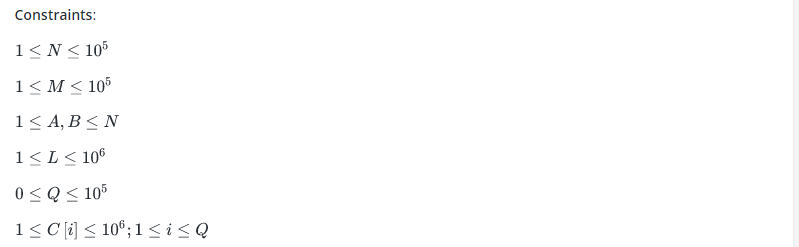

In [47]:
/*
Example :

SAMPLE INPUT 
4 6
1 2 1
1 3 5
1 4 5
1 2 3
2 1 4
2 3 6
5
5 8 2 2 3

SAMPLE OUTPUT 
5

Explanation
The computers 1 and 2 are connected by cables of latencies 1,3 and 4.
The computers 1 and 3 are connected by cable of latency 5.
The computers 1 and 4 are connected by cable of latency 5.
The computers 2 and 3 are connected by cable of latency 6.
The available cables have latencies: 5,8,2,2,3

If we take the cable of latency 1 between computers 1 and 2 (as given in the network),
    cable of latency 2 between computers 1 and 3 (from Q cables), 
    cable of latency 2 between computers 1 and 4 (from Q cables), 
    the latency of the network would be 1+2+2=5 , 
which is the minimum possible latency for the network.
*/

***https://ideone.com/aFoP2S***

***https://ideone.com/0gWbN8***

## **432. Mr. President**
https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/practice-problems/algorithm/mr-president/

In [50]:
/*
View Question link for qustion description
*/

In [51]:
/*
The first thing you can notice is that this is graph problem. 
You are given a graph G with N vertices and M weighted edges between them. 
You can change the weight of any edge to 1 - let's call this operation a transformation. 
You are interested in minimal number of transformations required to make, so that G has minimal spanning tree of weight not greater than K.

Solution for disconnected graphs
The first observation is that if the G is not connected, 
it does not have any spanning tree, and because you cannot add edges, 
there is no way to achieve the task it this case.

Solution for connected graphs
Let's assume that G is connected, so we know that G has a spanning tree. 
Let Ft be any spanning forest of G consisting of t trees. 
You know that you can extend Ft to a spanning tree of G by adding exactly t - 1 edges to it. 
Let w(Ft) be the sum of weights of edges in Ft. 
Since you can transform any edge to and edge of weight 1, 
    you know that you can transform Ft to a spanning tree of weight w(Ft) + t - 1. 
Since we are interested in the smallest number of transformations required to produce a graph with MST of weight not greater than K,
    we are interested in the smallest t, for which there exists Ft, such that w(Ft + t - 1 <= K.

If we only know the weight of the lightest forest Ft for each t, we can easily compute the answer.

How to compute the weights of these lightest forests?
The Kruskal algorithm is the answer here! Notice that in the i-th step of Kruskal algorithm 
    we compute the lightest forest consisting of N - i trees, 
    so in fact, we are computing the costs of our FN - i. 
This is great news, now we are able to run the Kruskal algorithm, 
and compute the answer to the problem during its execution.

Time complexity
Since Kruskal algorithm works in O(M * log(M), our solution works in the same exact time.
*/

***https://ideone.com/U5W76S***

## **433. Chocolate Journey**
https://www.hackerearth.com/practice/algorithms/graphs/shortest-path-algorithms/practice-problems/algorithm/successful-marathon-0691ec04/

In [52]:
/*
View Question link for qustion description
*/

In [53]:
/*
Run the shortest path algorithm from A and another one from B. 
Store all nodes which are at distance less than or equal to x from B into an array or vector. 
Now, 
    traverse through this vector and 
    find the sum of the minimum distance from A to this node 
    and minimum distance from B to this node and maintain the minimum of all these values.
*/

***https://ideone.com/s5S6mU***

## **434. Minimizing Path Cost**
https://www.hackerearth.com/practice/algorithms/graphs/shortest-path-algorithms/practice-problems/algorithm/minimizing-path-cost/

In [55]:
/*
View Question link for qustion description
*/

***https://ideone.com/KudHNn***

## **435. Oliver and the Game**
https://www.hackerearth.com/practice/algorithms/graphs/topological-sort/practice-problems/algorithm/oliver-and-the-game-3/

In [56]:
/*
View Question link for qustion description
*/

In [58]:
/*
This Problem can be solved by Depth First Search and Topological Sorting.

The idea is to maintain a global timer variable which stores an in time and an out time during DFS calls.

In any query we just need to check if one node is fully contained within another or not. 
In other words,
    if one node lies in the sub tree of the other node, then the answer might be YES depending on the Query type 0 or 1.
*/

***https://ideone.com/OnDE2p***